## <center> Phase 2 : Company Credit card Project </center>

#### BUSINESS ANALYST THE CREDIT CARD PROJECT WITH TARGET GROUP IN RANGE 18-24
#### INSIGHT OF THIS TARGET GROUP 

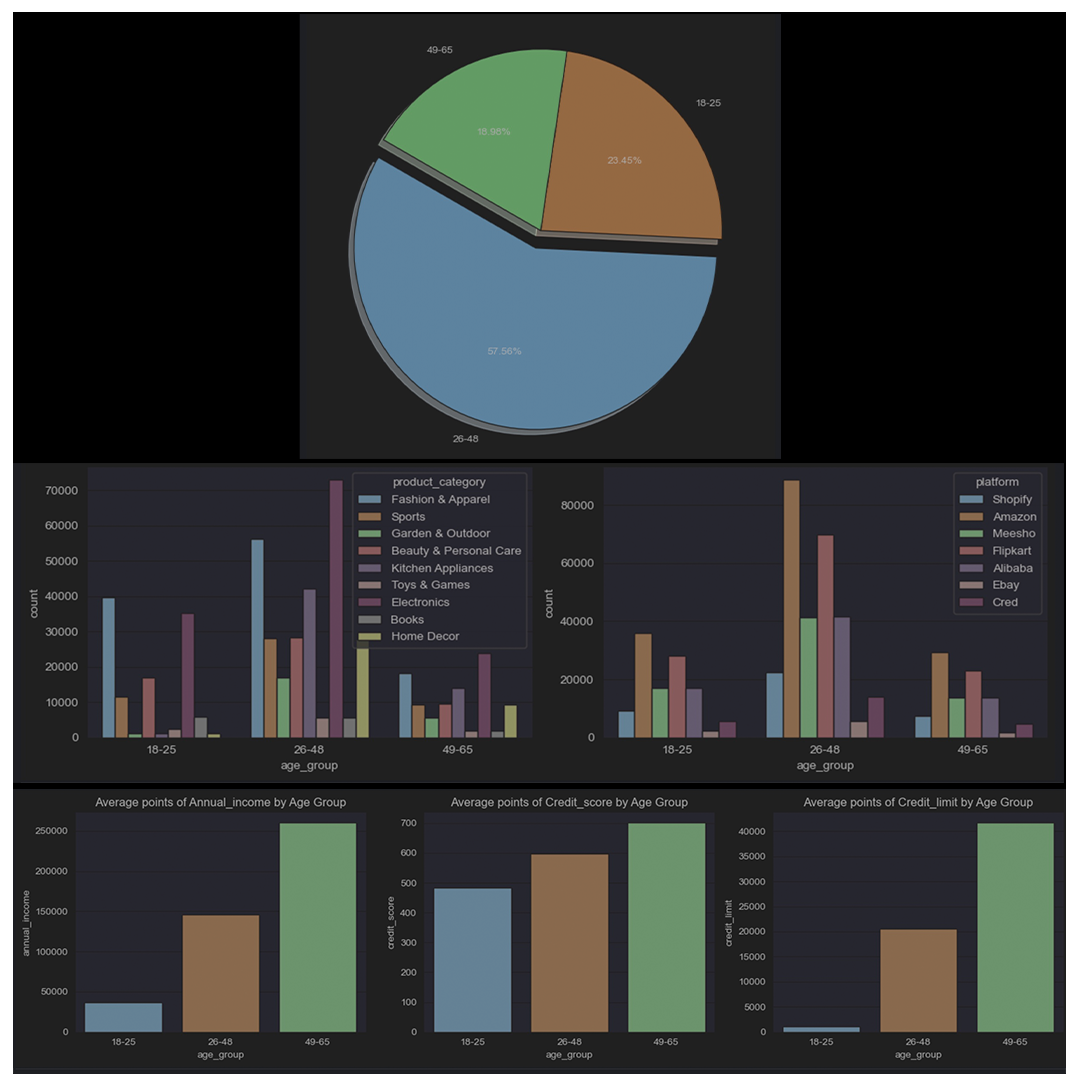

In [13]:
from PIL import Image
path_image = '../I do/analyst_chart.png'
# Open and display the image
from IPython.display import Image, display

# Display the image with specified width and height
display(Image(filename=path_image, width=500, height=300))


* The age group from 18-25 has roughly 24% of the whole age group
* The average income generate from this group is quite small, bellow 50k
* The average points of Credit Score is lower than other 2 group
* The limit amount is pretty small
* Top 3 category product of this group is paid for Fashion & Apparel, Electronics, Beauty & Personal care
* Top 3 platform which they usually pay on are : Amazon, Flipcart, Meesho.

1/ Campaign Planning :
    We will determine the campaign size, target customer group, and campaign duration.

In [14]:
#alpha = 5% default number
#import required libraries
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns


In [17]:
alpha = 0.05 
power = 0.8
effect_size = 0.2
sample_size = sms.tt_ind_solve_power(
    alpha = alpha,
    power = power,
    effect_size = effect_size,
    ratio=1,
    alternative='two-sided',
)
sample_size

393.4056989990335

#### * 2/ Execute campaign
    Launch campaign for specific customers

In [20]:
range_effect_size = [0.1,0.2,0.4,0.6,0.8]
for effect_size in range_effect_size:
    sample_size = sms.tt_ind_solve_power(
    alpha = alpha,
    power = power,
    effect_size = effect_size,
    ratio=1,
    alternative='two-sided',
    )
    print(f"the effect size is {effect_size} has the sample size {sample_size}")

the effect size is 0.1 has the sample size 1570.7330663315456
the effect size is 0.2 has the sample size 393.4056989990335
the effect size is 0.4 has the sample size 99.08032683981143
the effect size is 0.6 has the sample size 44.58579026363447
the effect size is 0.8 has the sample size 25.52457254602755


* The sample size generally we need for testing with effect size is 0.2 is 309 persons.
* But because of budget is limited, we decide to adjust the sample size by effect size to match the requirement and company budget
* So that we will determine the range of effect size 


* We determine that te sample size with 100 persons are match with our budget and we will choose testing with 100 persons
* But the reality showed just only 62% of this 100 had used the new release credit card, so that we have to set the number of sample size in reality is 62. And we need to set the control group test which age group is already using card to match the reality sample 62.
* The duration of 2 months and we will analyze if the new group will have better expense than the old group in same time or not by using z test (Because the sample size is greater than 30)

#### 3/ Post campaign for data collection
    Collect transactions from target and control customers

In [33]:
# Import data 
df = pd.read_csv('../solution source/data/avg_transactions_after_campaign.csv')
df.shape
sample_size = df.shape[0]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   campaign_date           62 non-null     object 
 1   control_group_avg_tran  62 non-null     float64
 2   test_group_avg_tran     62 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [23]:
df.describe()

,control_group_avg_tran,test_group_avg_tran
count,62.000000,62.000000
mean,221.175161,235.983548
std,21.359192,36.658082
min,158.550000,140.610000
25%,205.435000,215.230000
50%,221.560000,234.205000
75%,233.482500,260.617500
max,265.450000,344.080000


In [24]:
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


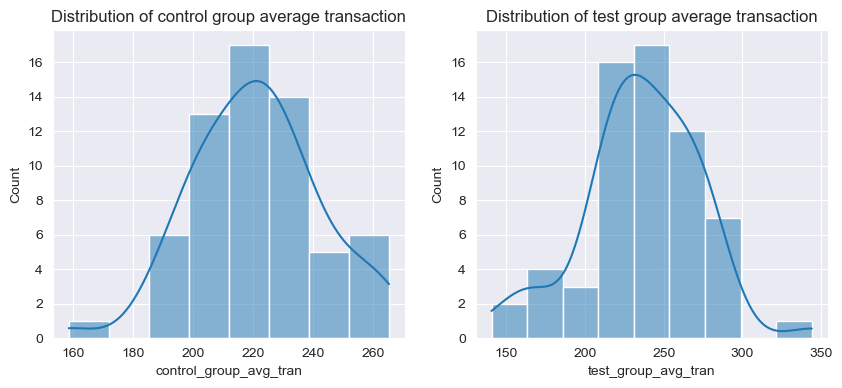

In [30]:
n_rows = 1
n_cols = 2
fig2, axes = plt.subplots(n_rows, n_cols, figsize=(10,4))
axes = axes.flatten()
# Plot the first list in the first subplot
sns.histplot(
    data=df['control_group_avg_tran'],
    kde=True,
     ax=axes[0]
)
axes[0].title.set_text('Distribution of control group average transaction')
sns.histplot(
    data=df['test_group_avg_tran'],
    kde=True,
     ax=axes[1]
)
axes[1].title.set_text('Distribution of test group average transaction')

In [31]:
#Get mean and std for control group
control_mean = df['control_group_avg_tran'].mean()
control_std = df['control_group_avg_tran'].std()
control_mean, control_std

(221.1751612903226, 21.359192112027014)

In [32]:
#Get mean and std for test group
test_mean = df['test_group_avg_tran'].mean()
test_std = df['test_group_avg_tran'].std()
test_mean, test_std

(235.9835483870968, 36.65808210918637)

In [34]:
#Determine z score
a = control_std**2/sample_size
b = test_std**2/sample_size
z_score = (test_mean - control_mean) /np.sqrt(a+b)
z_score

2.7482973745691135

In [38]:
p_value = 1 - st.norm.cdf(z_score)
p_value

0.0029952824622024865

In [39]:
z_critical = st.norm.ppf(1 - alpha)
z_critical

1.6448536269514722

In [40]:
# Performing Z-test with above considerations
z_statistic, p_value = sm.stats.ztest( df['test_group_avg_tran'],df['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(2.7482973745691135, 0.002995282462202502)

#### 4/ Hypothesis testing and make decision
    Determine if transaction amount is different

* Hypothesis of concept :
* H0 - Null hypothesis : The new test group will not get the transaction is higher than the control transaction
* Ha - Alternate hypothesis : The new test will generate the amount of transaction higher than control

* Conclusion : Because z_score > z_critical : We determine to reject H0 - null hypothesis. This is mean we will accept Ha, the alternative hypothesis which new test is generated amount of transaction higher than old one.
* Company will launch the new project with new credit card which target to age group from 18-25 